# Importing some packages

In [3]:
import random
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.functional as F

from torch.utils.data import DataLoader, Dataset, random_split, WeightedRandomSampler, SubsetRandomSampler
from torchvision.transforms import Compose, ToTensor, Normalize, ToPILImage, RandomHorizontalFlip, Resize

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from stepbystep.v0 import StepByStep
from data_generation.image_classification import generate_dataset
from plots.chapter4 import *


# Data generation

In [2]:
images, labels = generate_dataset(img_size=5, n_images=300, binary=True, seed=13)

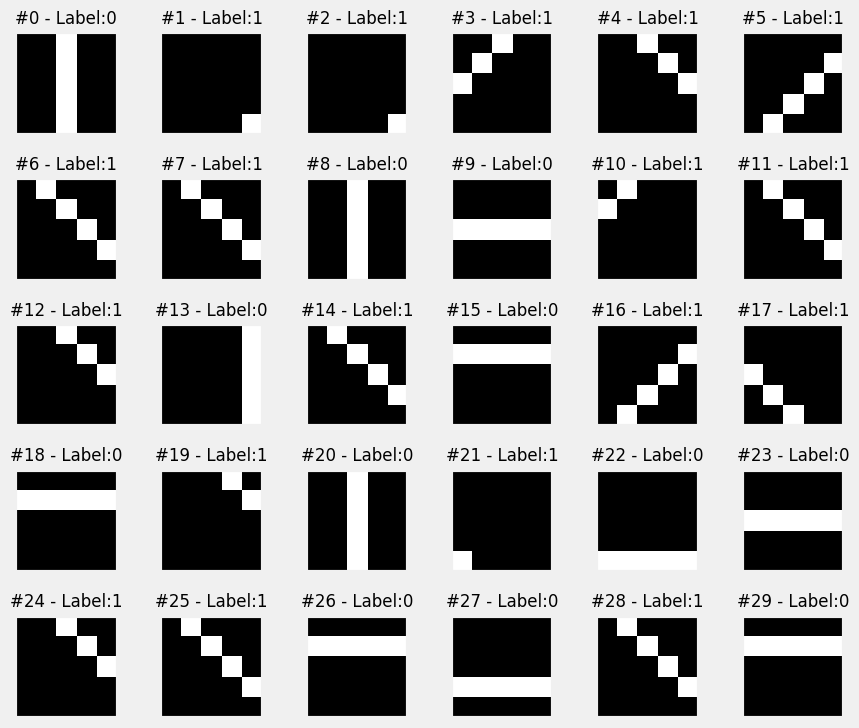

In [4]:
fig = plot_images(images, labels, n_plot=30)

In [5]:
images.shape

(300, 1, 5, 5)

In [6]:
image_example = images[7]
image_example

array([[[  0, 255,   0,   0,   0],
        [  0,   0, 255,   0,   0],
        [  0,   0,   0, 255,   0],
        [  0,   0,   0,   0, 255],
        [  0,   0,   0,   0,   0]]], dtype=uint8)

# Transformations

In [7]:
pil_image = np.transpose(image_example, (1, 2, 0))
pil_image.shape

(5, 5, 1)

In [9]:
tensorizer = ToTensor()
tensor_image = tensorizer(pil_image)
tensor_image.shape

torch.Size([1, 5, 5])

<class 'PIL.Image.Image'>


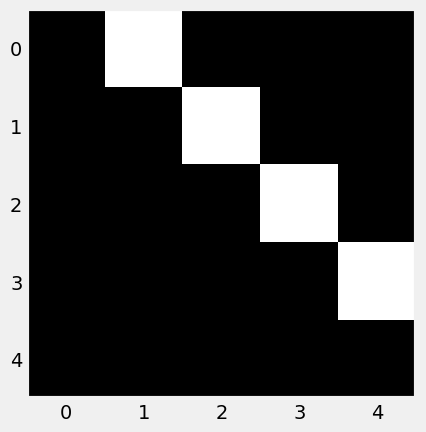

In [11]:
new_pil_image = ToPILImage()(tensor_image)
print(type(new_pil_image))

plt.imshow(new_pil_image, cmap='gray')
plt.grid(False);

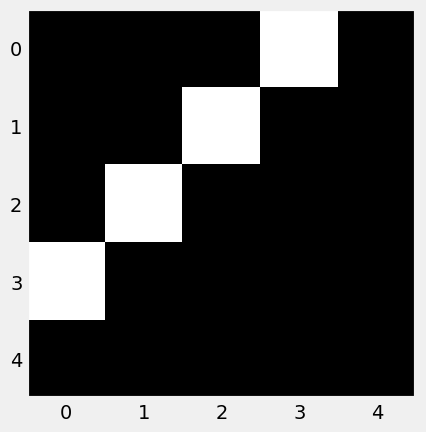

In [12]:
flipped_image = RandomHorizontalFlip(p=1.0)(new_pil_image)

plt.imshow(flipped_image, cmap='gray')
plt.grid(False)

There are only four transforms that take (non-image) tensors as inputs: LinearTransformation(), Normalize(), RandomErasing(), and ConvertImageDtype().

In [13]:
img_tensor = tensorizer(flipped_image)
img_tensor

tensor([[[0., 0., 0., 1., 0.],
         [0., 0., 1., 0., 0.],
         [0., 1., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])

In [14]:
normalizer = Normalize(mean=(0.5,), std=(0.5,))
normalized_img = normalizer(img_tensor)
normalized_img

tensor([[[-1., -1., -1.,  1., -1.],
         [-1., -1.,  1., -1., -1.],
         [-1.,  1., -1., -1., -1.],
         [ 1., -1., -1., -1., -1.],
         [-1., -1., -1., -1., -1.]]])

In [19]:
composer = Compose([
    RandomHorizontalFlip(p=1.0),
    Normalize(mean=(0.5,), std=(0.5,))
])

composed_img = composer(tensor_image)

assert (composed_img == normalized_img).all()